<a href="https://colab.research.google.com/github/ananyatrivedi1/PyTorch/blob/main/01_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X2 = torch.arange(start, end, step)

X[:10], X2[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing (can randomize it too)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # trainsplit onwards

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
X_train.shape

torch.Size([40, 1])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

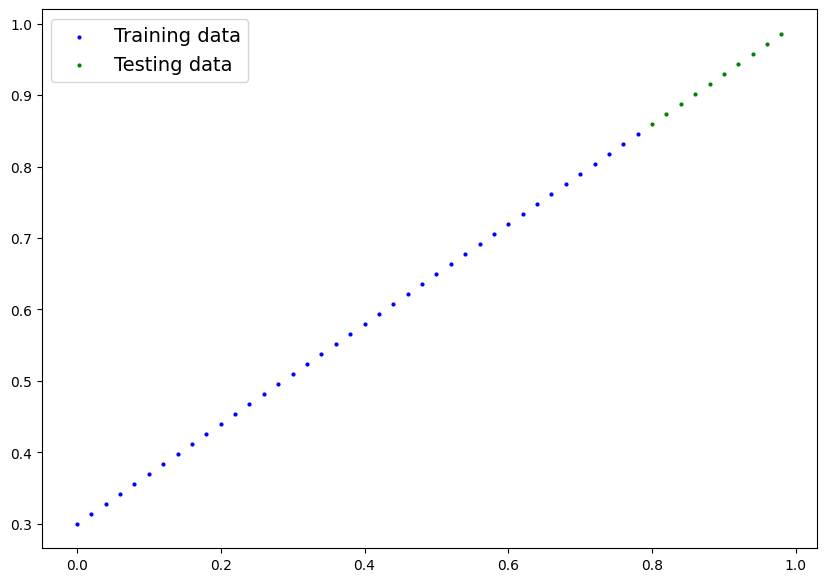

In [ ]:
plot_predictions();

## Build Model

In [ ]:
from torch import nn

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        # holds parameters that are intended to be learnt; You don't need to manually tell the optimizer which tensors to update
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model REQUIRED
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


What the model does:
* start with random values (weights and bias)
* look at the training data and adjust the random values (the weight and bias values to better represent the ideal values (the known ones)

How? Gradient Descent & Back Propagation.


Almost everything in a PyTorch neural network comes from torch.nn,

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [ ]:
# Creating a model instance

# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(41)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.7906], requires_grad=True),
 Parameter containing:
 tensor([-0.6410], requires_grad=True)]

In [ ]:
# List named parameters
# We can also get the state (what the model contains) of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.7906])), ('bias', tensor([-0.6410]))])

Inference mode disables autograd (PyTorch will not track computations for gradients -> saves memory & speeds up execution since no backward pass or gradients are needed). Used when you're running the model just to make predictions, and not for training or updating weights.

Model parameters aren't updated (accidentally or on purpose) -> read only. Always use inference mode during deployment or evaluation, when you're only interested in outputs and not in training or updating weights.

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.0085],
        [ 0.0073],
        [ 0.0231],
        [ 0.0389],
        [ 0.0547],
        [ 0.0705],
        [ 0.0863],
        [ 0.1022],
        [ 0.1180],
        [ 0.1338]])


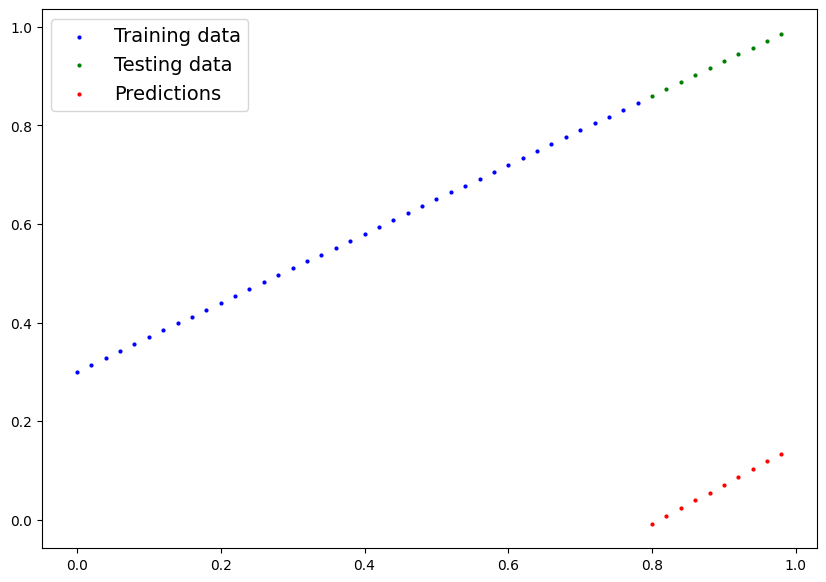

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.8685],
        [0.8667],
        [0.8649],
        [0.8631],
        [0.8613],
        [0.8595],
        [0.8577],
        [0.8558],
        [0.8540],
        [0.8522]])

Now we want some kind of metric that will tell us which direction to update the weights and bias in. This is where the Loss Function comes in. Our goal will be to minimize this Loss Function.

Loss function -> how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`).

Mean Absolute Error (MAE) -> take difference of expected and observed and average them.

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer (instance of the class)
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

Learning rate is a hyperparameter. We can adjust these overtime (learning rate scheduling)

### Training Loop
1. Forward pass -> model goes through all of the training data once.
2. Loss Function -> the models outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are
3. Zero Gradients -> sets gradients to zero
4. Back propagation (computes gradients of the loss with respect to every parameter)
5. Update the Optimizer (gradient descent)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    #print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train) # y_train & y_test values are known
    # nn.L1Loss()

    # 3. Zero grad of the optimizer
    # see https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html
    optimizer.zero_grad() # restes the gradients of all model parameters to 0
    # PyTorch accumulates gradients (sums them) in each parameter’s .grad attribute.
    # If you don’t reset the gradients, they’ll keep accumulating from multiple batches

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    # SO that it doesn't store the gradients.
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)

            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.9056513905525208 | MAE Test Loss: 0.8468971252441406 
Epoch: 10 | MAE Train Loss: 0.7904413938522339 | MAE Test Loss: 0.7121872901916504 
Epoch: 20 | MAE Train Loss: 0.6752315759658813 | MAE Test Loss: 0.5774774551391602 
Epoch: 30 | MAE Train Loss: 0.560021698474884 | MAE Test Loss: 0.4427676796913147 
Epoch: 40 | MAE Train Loss: 0.4448118209838867 | MAE Test Loss: 0.3080577850341797 
Epoch: 50 | MAE Train Loss: 0.3296017646789551 | MAE Test Loss: 0.17334780097007751 
Epoch: 60 | MAE Train Loss: 0.21439166367053986 | MAE Test Loss: 0.03863748908042908 
Epoch: 70 | MAE Train Loss: 0.10982899367809296 | MAE Test Loss: 0.0844271257519722 
Epoch: 80 | MAE Train Loss: 0.0819958820939064 | MAE Test Loss: 0.1355685293674469 
Epoch: 90 | MAE Train Loss: 0.07420036941766739 | MAE Test Loss: 0.1525849997997284 


`detach()` Avoids tracking for later operations: By detaching, you tell PyTorch, "I want this value as raw data, not as part of gradient calculations." Prevents memory overhead & errors in later computations.

If you directly do `loss.numpy()`, you’ll get an error because PyTorch tensors that require grad and are on the computation graph must be on the CPU and detached before conversion.



The `loss_fn` comes from torch.nn (ex: nn.MSELoss()).

```
y_pred = model(X_train)
loss = loss_fn(y_pred, y_train)

test_pred = model(X_test)
test_loss = loss_fn(test_pred, y_test.type(torch.float))
```

**At the start**:
The model’s parameters (weights, biases) are randomly initialized, so its predictions start off poorly.

**First epoch**:
The model computes predictions and error (loss) on the whole dataset.
Gradients show how parameters should change to reduce the error.
The optimizer (e.g., SGD) updates those parameters a tiny bit.

**Next epoch**:
Model uses the latest (improved) parameters.
Its predictions are slightly better.
Loss is recalculated, gradients are computed, parameters are updated again.

**This repeats**:
With each new epoch the model keeps refining its predictions as its parameters keep getting adjusted to fit the data better.

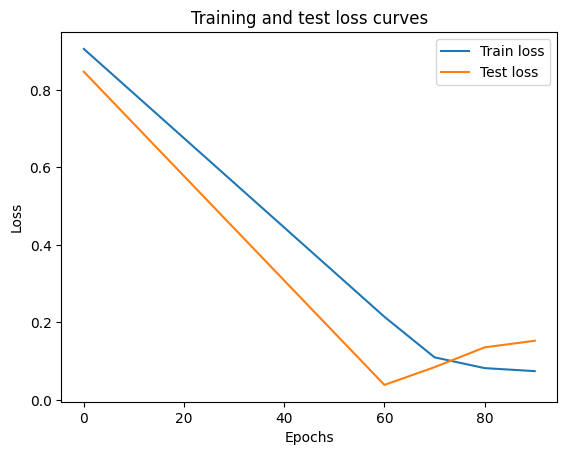

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
def predictions():
  train_loss = []
  test_loss = []

  # forward prop
  # loss function
  # back prop
  # optimizer
  for epoch in range(100):
    model_0.train()
    y_preds = model_0(X_test)
    loss = loss_fn(y_preds, y_test)
    optimizer.zero_grad()
    loss.backward()
    model_0.eval()
    optimizer.step()

    if epoch % 10 == 0:
      train_loss.append(loss.detach())


In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict()) # we can print this in each iteration as well
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([1.0447]), 'bias': tensor([0.1490])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


**Training mode:**
Gradients: Computation graph is created for backpropagation; parameters will be updated.

**Inference mode:**  When you’re testing, validating, or deploying the model, you switch to evaluation or inference mode. Disables gradient tracking to make predictions faster and more memory-efficient.


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.9848],
        [1.0057],
        [1.0266],
        [1.0475],
        [1.0684],
        [1.0893],
        [1.1102],
        [1.1311],
        [1.1519],
        [1.1728]])

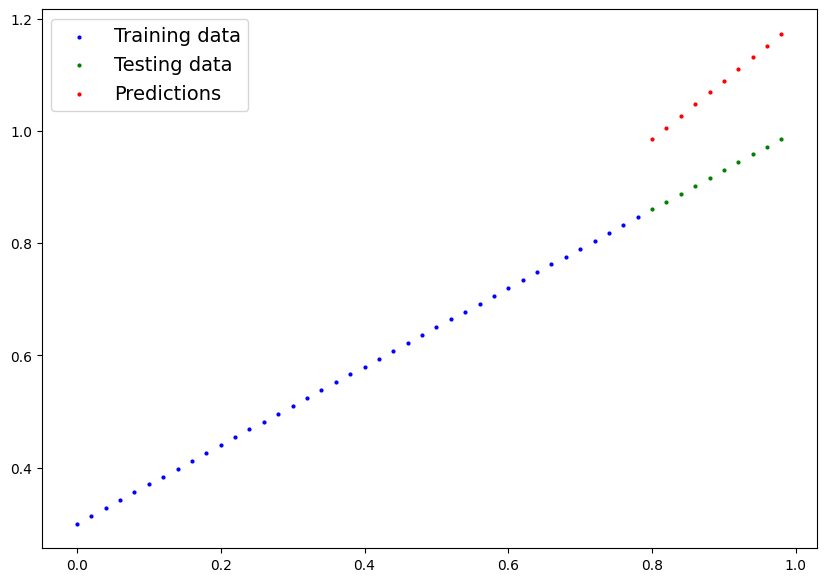

In [ ]:
plot_predictions(predictions=y_preds)

Running the epochs multiple times will improve the learning of the model.

### Saving a PyTorch Model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Oct 15 00:34 models/01_pytorch_workflow_model_0.pth


In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Redoing with device agnostic code

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Create weight and bias
weight = 0.2
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2040],
         [0.2080],
         [0.2120],
         [0.2160],
         [0.2200],
         [0.2240],
         [0.2280],
         [0.2320],
         [0.2360]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

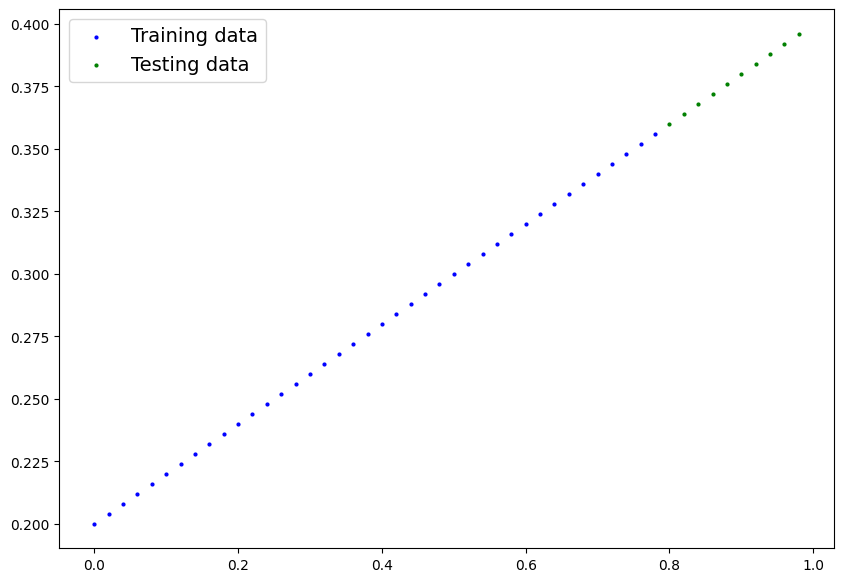

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Built-in forward pass (`output = nn.Linear(input)`). Weights and biases automatically registered as model parameters. Includes standard initialization and can be stacked, moved to GPU, etc.

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad() #see torch.optim.Optimizer.zero_grad

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

NameError: name 'torch' is not defined

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.2094]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2050], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.2, bias: 0.2


In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.3725],
        [0.3767],
        [0.3809],
        [0.3851],
        [0.3892],
        [0.3934],
        [0.3976],
        [0.4018],
        [0.4060],
        [0.4102]], device='cuda:0')

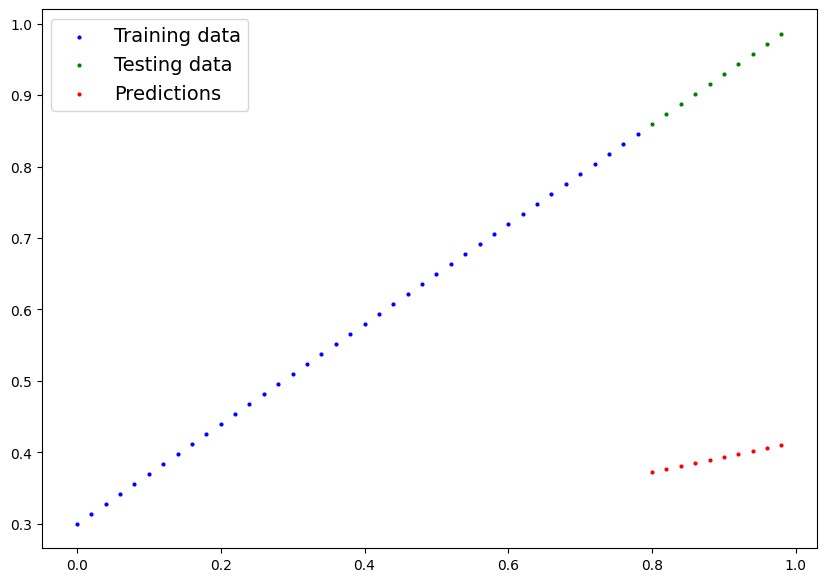

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Create X, y

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
X
y = weight*X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

Split Data

In [ ]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Plot & Check

In [ ]:
def plot_predictions2(train_X, train_y, test_X, test_y, predictions=None):
  plt.plot(train_X, train_y, c="b", s="4", label="training data")
  plt.plot(test_X, test_y, c="b", s="4", label="training data")
  plt.plot(test_X, predictions, c="b", s="4", label="training data")
  plt.legend()


AttributeError: Line2D.set() got an unexpected keyword argument 's'

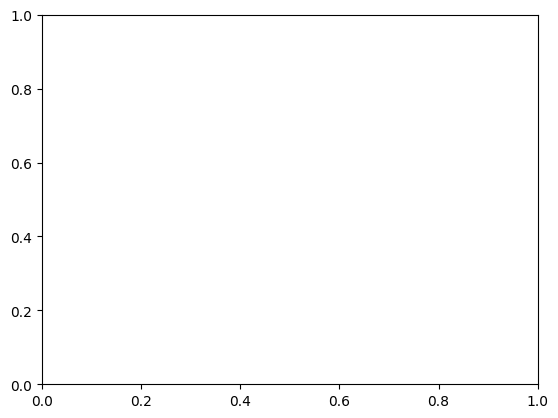

In [ ]:
plot_predictions2(X_train, y_train, X_test, y_test)